C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 1.7995e-04 - val_loss: 1.1299e-05
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.5571e-05 - val_loss: 1.3658e-05
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.4129e-05 - val_loss: 9.8286e-06
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0525e-05 - val_loss: 9.1800e-06
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.0272e-05 - val_loss: 1.8700e-05
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.1619e-05 - val_loss: 8.1432e-06
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.3665e-06 - val_loss: 1.4335e-05
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.2950e-06 - val_loss: 7.3611e-06
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2385e-06 - val_loss: 1.0054e-05
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2324e-06 - val_loss: 8.5056e-06
Epoch 11/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.4197e-0

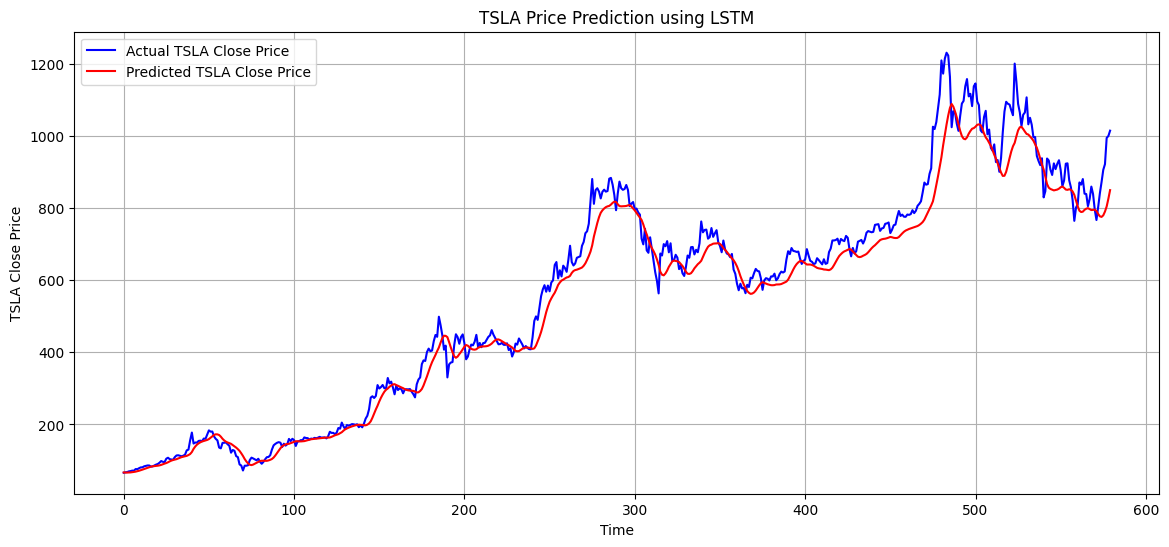

In [8]:
# LSTM-based Time Series Forecasting for TSLA Stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
data = pd.read_csv("C:\\Users\\Asus\\Downloads\\important amanurrab zoya\TSLA.csv")
data = data[['Close']]
data.dropna(inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Prepare training data (60 timesteps)
X, y = [], []
timestep = 60
for i in range(timestep, len(data_scaled)):
    X.append(data_scaled[i-timestep:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # 3D input for LSTM

# Split into training and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, color='blue', label='Actual TSLA Close Price')
plt.plot(predictions, color='red', label='Predicted TSLA Close Price')
plt.title('TSLA Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('TSLA Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#forecasting using arima and sarima 

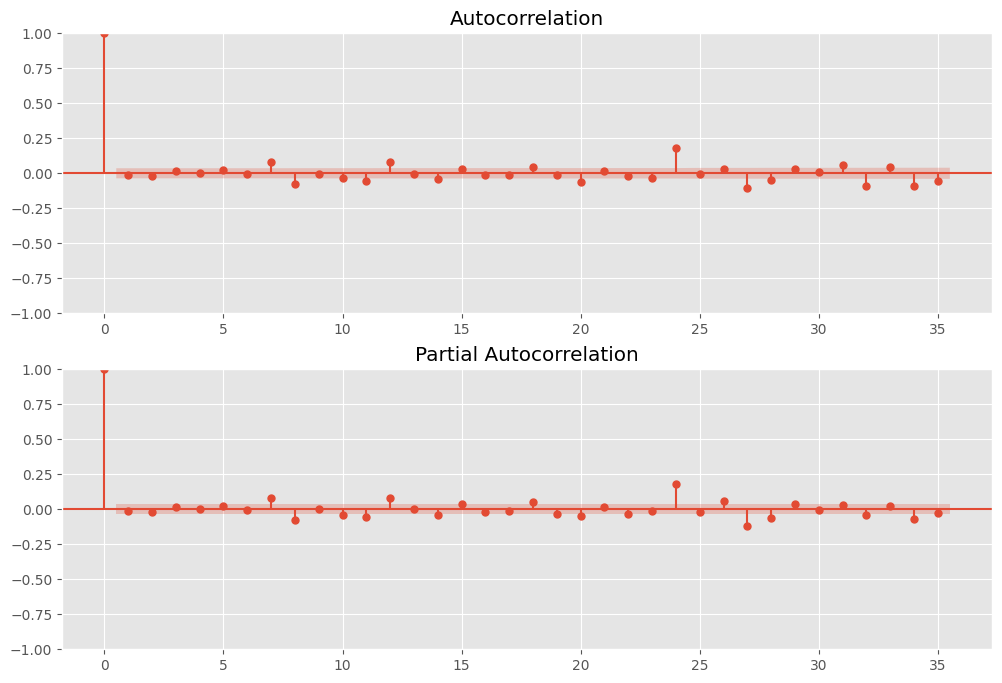

In [101]:
#now pvalues is less than 0.05, reject the null>> time series is stationary, if not stationary, then again you need to differencing


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(df_close, ax = axes[0])
plot_pacf(df_close, ax = axes[1])
plt.show()

In [181]:
#arima

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2956
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11329.162
Date:                Thu, 24 Jul 2025   AIC                          22664.324
Time:                        12:04:02   BIC                          22682.298
Sample:                             0   HQIC                         22670.794
                               - 2956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3716     54.589     -0.007      0.995    -107.364     106.621
ma.L1          0.3715     54.591      0.007      0.995    -106.625     107.368
sigma2       125.1982      0.717    174.698      0.0

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


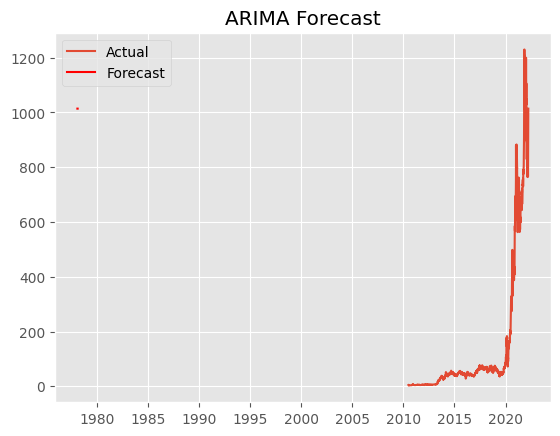

In [179]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\important amanurrab zoya\TSLA.csv", parse_dates=['Date'], index_col='Date')
df = df[['Close']]  # Use the relevant column

# Fit ARIMA
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)
print("Forecast:", forecast)

# Plot
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


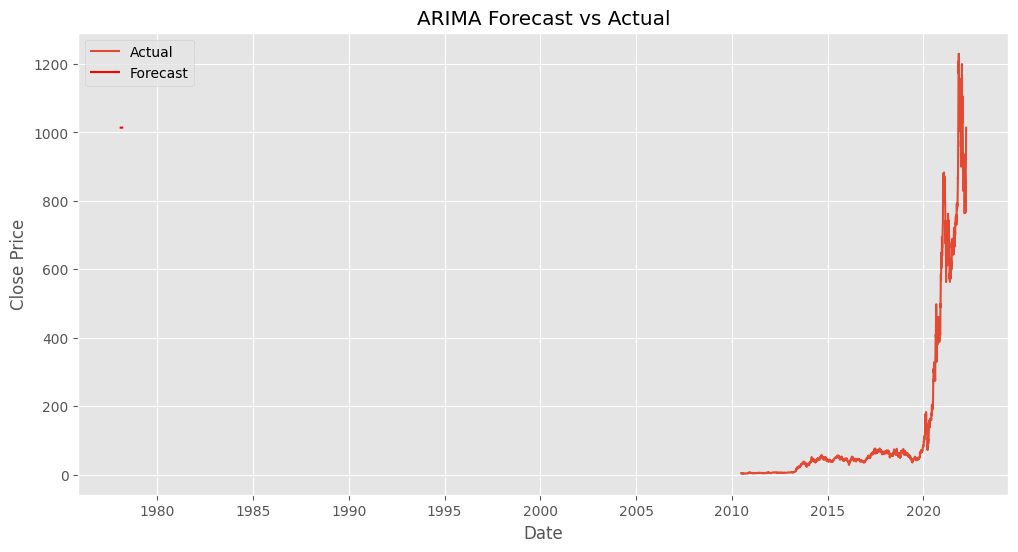

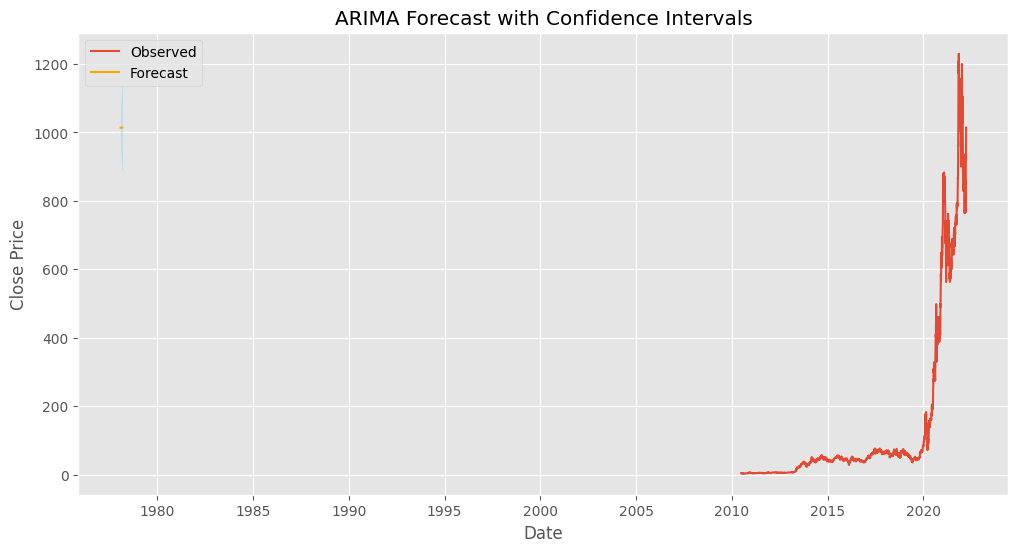

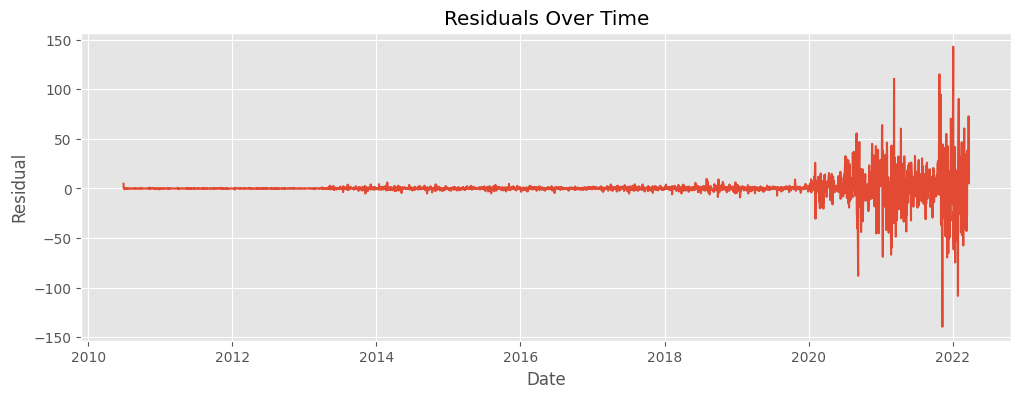

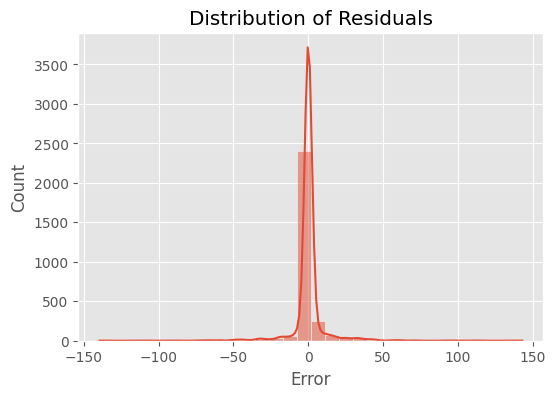

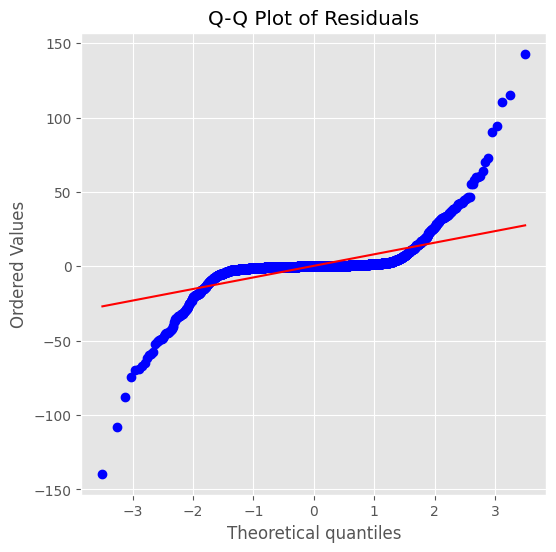

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import scipy.stats as stats

# Step 1: Load your data
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\important amanurrab zoya\TSLA.csv", parse_dates=['Date'], index_col='Date')
df = df[['Close']]

# Step 2: Fit ARIMA model
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Forecast
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Step 4: Residuals
residuals = model_fit.resid

# Plot 1: Actual vs Forecasted
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='lightblue', alpha=0.5)
plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals Over Time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Plot 4: Residual Distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.grid(True)
plt.show()

# Plot 5: Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


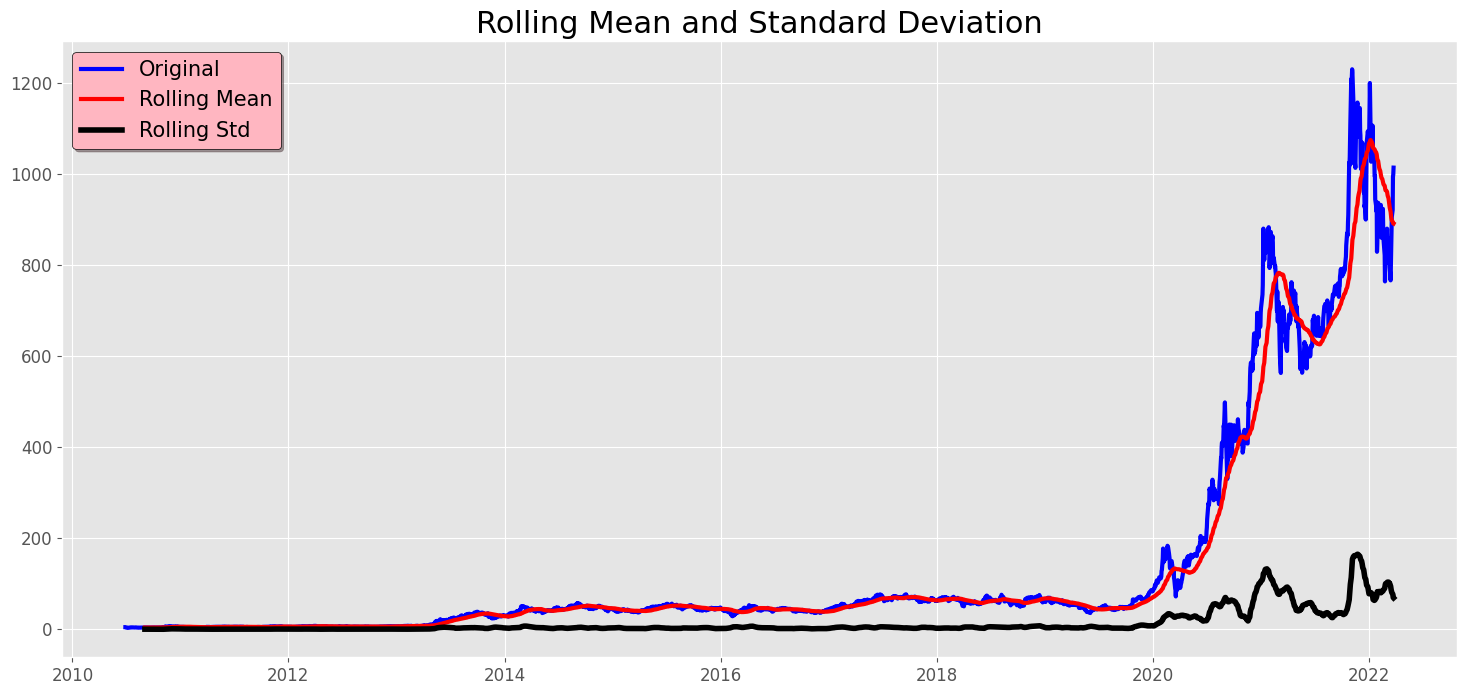


Results of Dickey-Fuller Test:
Test Statistic             1.423942
p-value                    0.997220
#Lags Used                28.000000
#Observations Used      2927.000000
Critical Value (1%)       -3.432586
Critical Value (5%)       -2.862528
Critical Value (10%)      -2.567296
dtype: float64


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


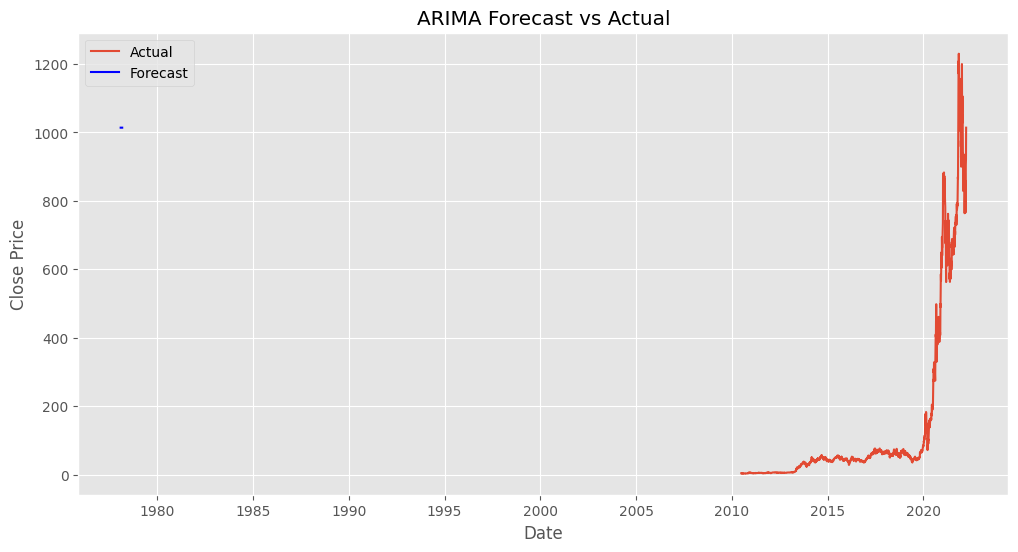

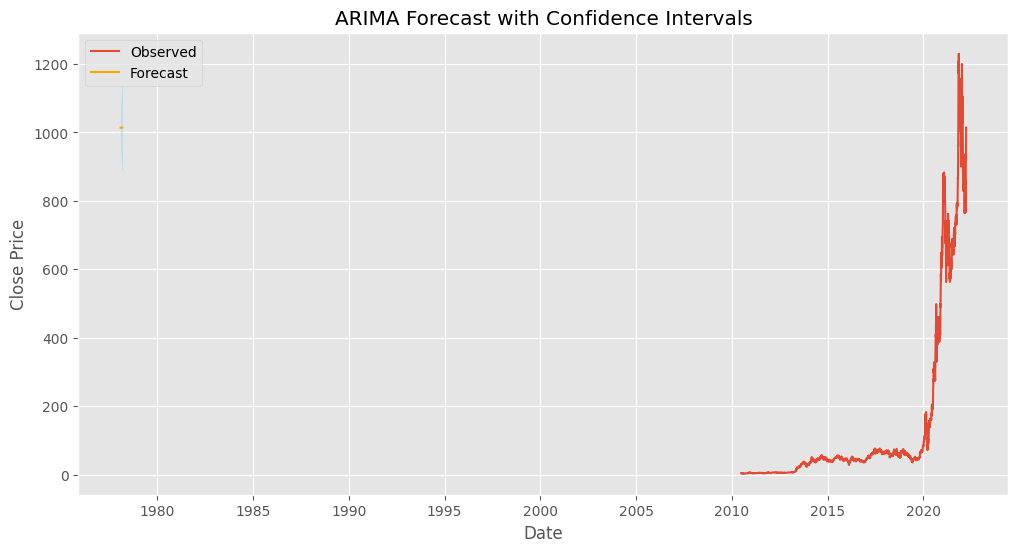

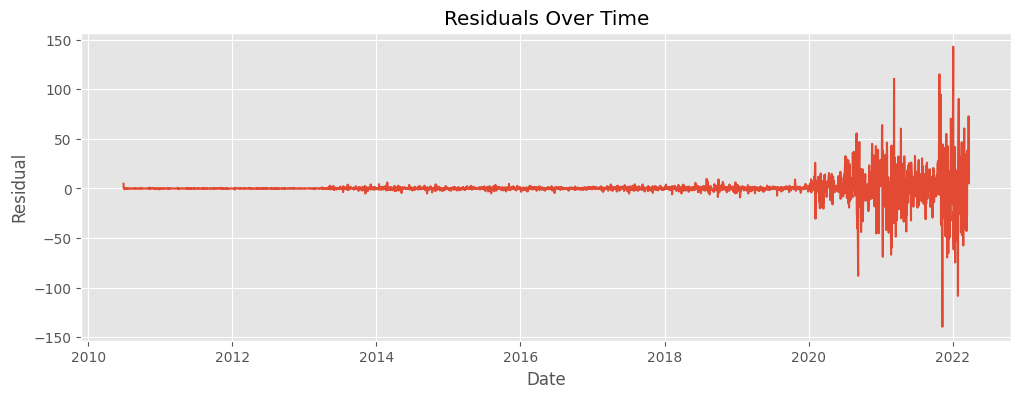

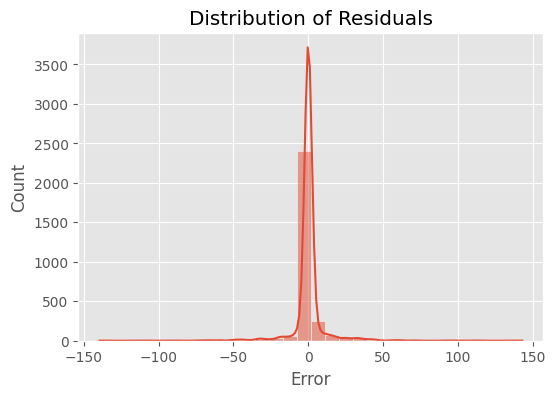

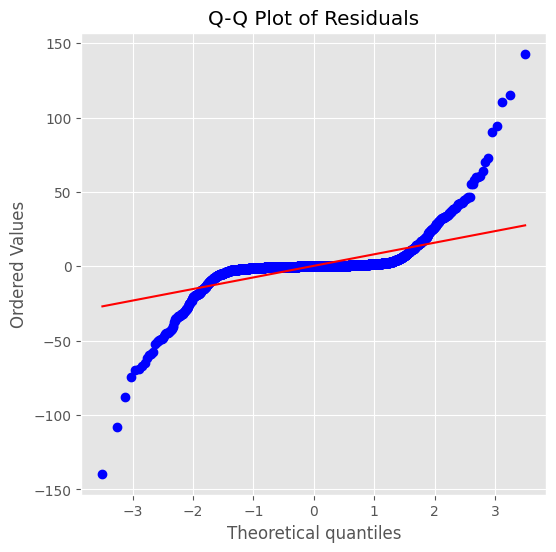

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import scipy.stats as stats

# Step 1: Load your data
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\important amanurrab zoya\TSLA.csv", parse_dates=['Date'], index_col='Date')
df = df[['Close']]

# Step 2: Stationarity Test Function
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(48).mean()
    rolstd = timeseries.rolling(48).std()

    # Plot rolling statistics
    plt.figure(figsize=(18, 8))
    plt.grid(True)
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
    plt.legend(loc='best', fontsize=15, shadow=True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    print("\nResults of Dickey-Fuller Test:")
    adft = adfuller(timeseries.dropna(), autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)

# Step 3: Run Stationarity Test
test_stationarity(df['Close'])

# Step 4: Fit ARIMA model
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Step 5: Forecast
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Step 6: Residuals
residuals = model_fit.resid

# Plot 1: Actual vs Forecasted
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='blue')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Forecast with Confidence Interval
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='lightblue', alpha=0.5)
plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals Over Time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Plot 4: Residual Distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.grid(True)
plt.show()

# Plot 5: Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


In [183]:


#sarima


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2956
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11298.611
Date:                            Thu, 24 Jul 2025   AIC                          22607.222
Time:                                    12:05:06   BIC                          22637.158
Sample:                                         0   HQIC                         22618.000
                                           - 2956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7736      1.248      0.620      0.535      -1.672       3.219
ma.L1         -0.7746      1.245   

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


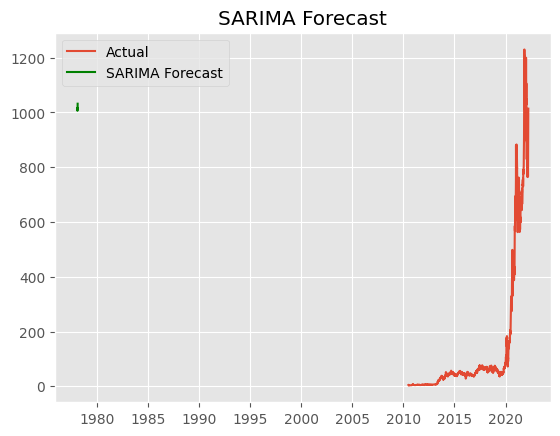

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA (p,d,q)(P,D,Q,s)
model = SARIMAX(df['Close'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12))  # s = 12 for monthly
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)

# Plot
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()


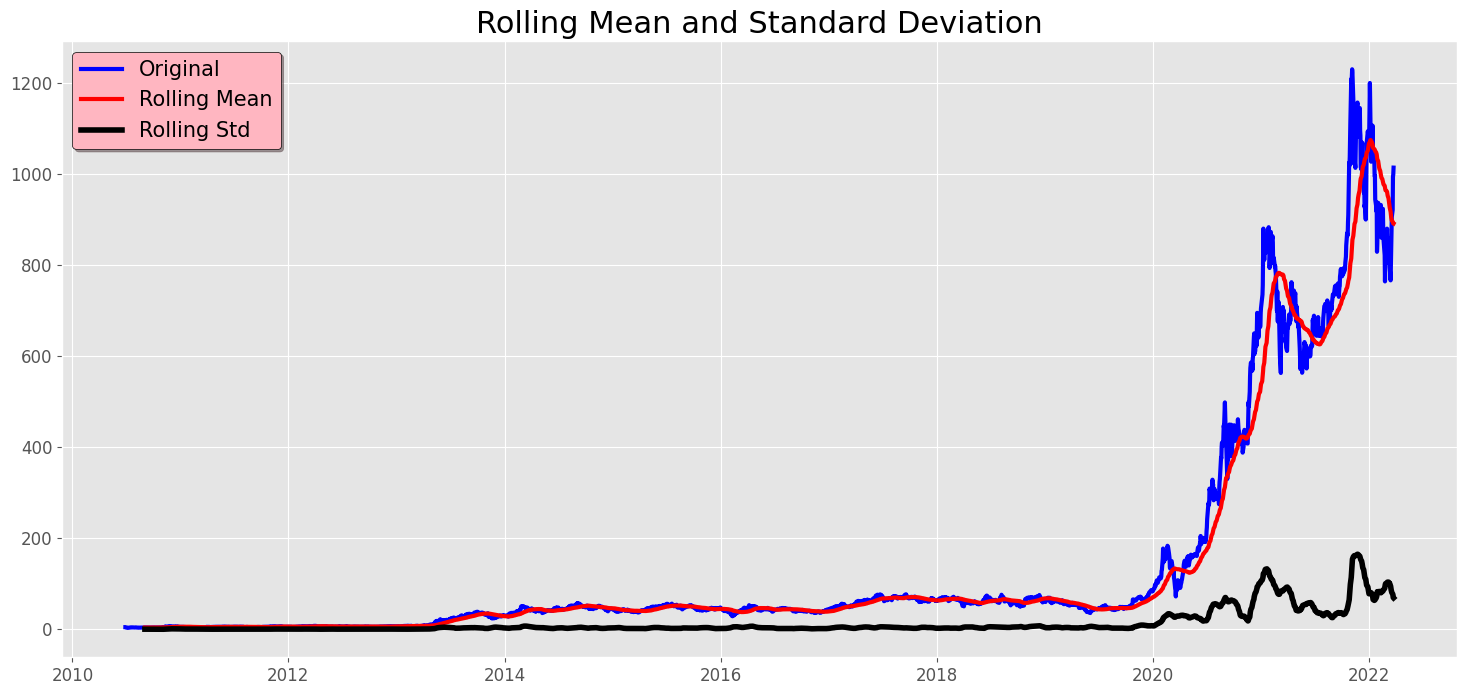


Results of Dickey-Fuller Test:
Test Statistic             1.423942
p-value                    0.997220
#Lags Used                28.000000
#Observations Used      2927.000000
Critical Value (1%)       -3.432586
Critical Value (5%)       -2.862528
Critical Value (10%)      -2.567296
dtype: float64


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


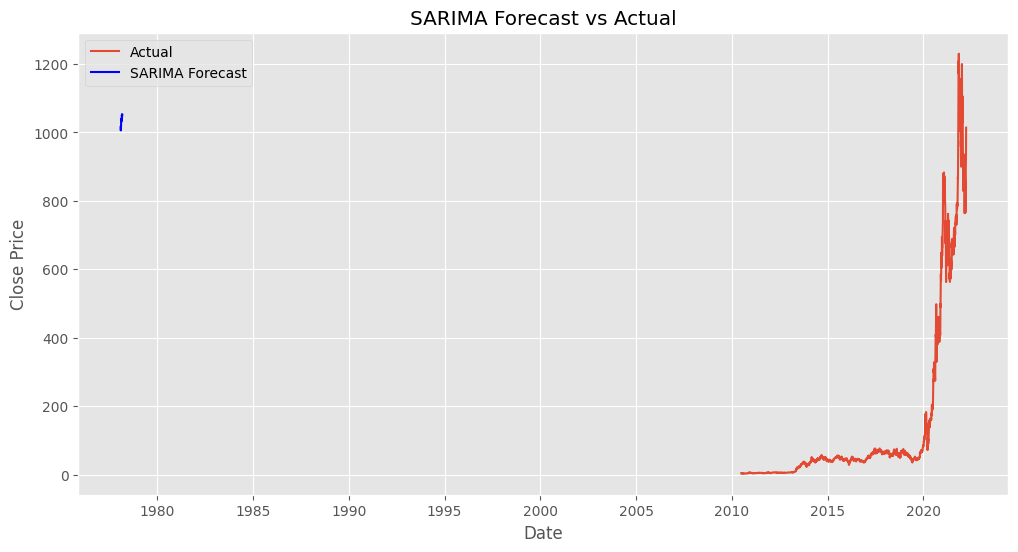

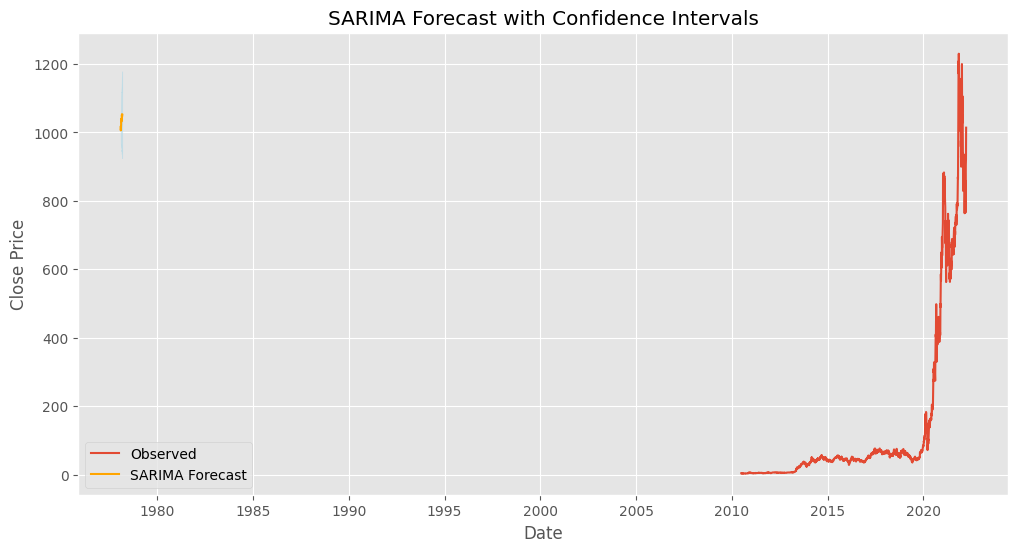

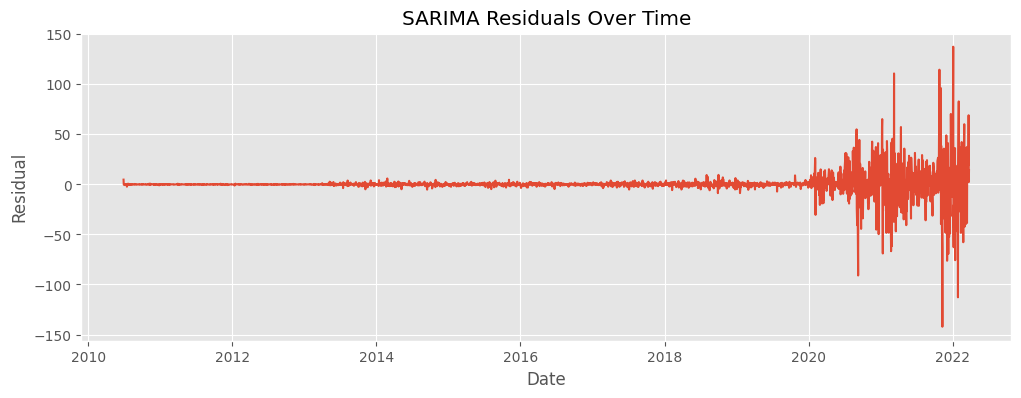

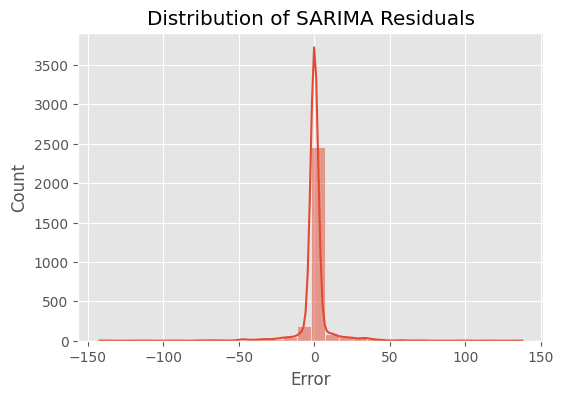

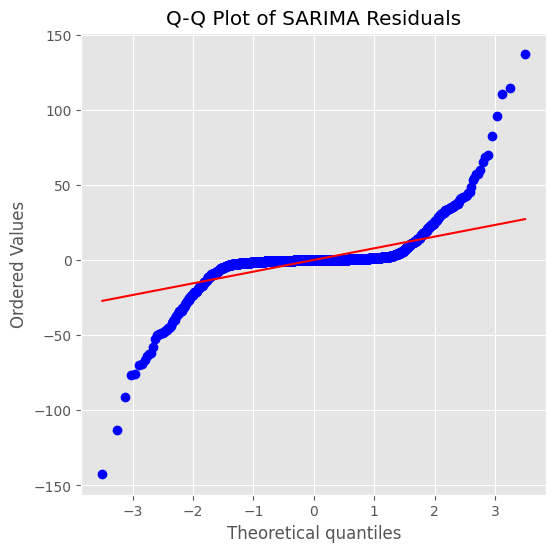

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\important amanurrab zoya\\TSLA.csv", parse_dates=['Date'], index_col='Date')
df = df[['Close']]

# Stationarity test
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(48).mean()
    rolstd = timeseries.rolling(48).std()

    plt.figure(figsize=(18, 8))
    plt.grid(True)
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
    plt.legend(loc='best', fontsize=15, shadow=True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    print("\nResults of Dickey-Fuller Test:")
    adft = adfuller(timeseries.dropna(), autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)

# Run the stationarity test
test_stationarity(df['Close'])

# Fit SARIMA model: SARIMA(p,d,q)(P,D,Q,s)
# Note: You might want to tune these parameters based on AIC/BIC or use auto_arima
model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))  # Monthly seasonality (s=12)
model_fit = model.fit(disp=False)

# Forecast
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Residuals
residuals = model_fit.resid

# Plot 1: Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='blue')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Forecast with Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='lightblue', alpha=0.5)
plt.title('SARIMA Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals Over Time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('SARIMA Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

# Plot 4: Residual Distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of SARIMA Residuals")
plt.xlabel("Error")
plt.grid(True)
plt.show()

# Plot 5: Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of SARIMA Residuals")
plt.grid(True)
plt.show()
